<a href="https://colab.research.google.com/github/Andoniadou-Lab/consensus_pituitary_atlas/blob/main/Supp_Fig_1_and_13_QC_revision_ATAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/pituitary_atlas/source_table/pituitary_atlas.xlsx')
#reset
df.reset_index(drop=True, inplace=True)
df

,GEO,SRA_ID,Name,Conditions,Normal,Background,Sorted,Author,DOI,Age,...,filtering_junk,median_cellassign_prob,most_recent_workflow,n_cells,processed_atac,passed_qc_tcc,tcc_pseudobulked,Core,Notes 1,Notes 2
0,GSM4594333,SRX8489818,M-Pituitary,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,1.0,1.0,v_0.01,1278.0,0.0,1.0,v_0.01,1,NaN,NaN
1,GSM4594334,SRX8489819,FM_Pit_1-1,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,1.0,1.0,v_0.01,8236.0,0.0,1.0,v_0.01,1,NaN,NaN
2,GSM4594335,SRX8489820,FM_Pit_1-2,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,1.0,1.0,v_0.01,7092.0,0.0,1.0,v_0.01,1,NaN,NaN
3,GSM4594336,SRX8489821,MM_Pit_4-1,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,1.0,1.0,v_0.01,1755.0,0.0,1.0,v_0.01,1,NaN,NaN
4,GSM4594337,SRX8489822,MM_Pit_1v2,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,1.0,1.0,v_0.01,416.0,0.0,1.0,v_0.01,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,GSM9302173,SRX31166359,"pituitary, HFD_2",High_fat_diet,1,Unclear,0,Guo et al. (2025),NaN,16 weeks,...,1.0,1.0,v_0.01,7193.0,NaN,NaN,NaN,1,NaN,NaN
279,GSM9302174,SRX31166360,"pituitary, ND_1",Normal_diet,0,Unclear,0,Guo et al. (2025),NaN,16 weeks,...,1.0,1.0,v_0.01,7298.0,NaN,NaN,NaN,1,NaN,NaN
280,GSM9302175,SRX31166361,"pituitary, ND_2",Normal_diet,0,Unclear,0,Guo et al. (2025),NaN,16 weeks,...,1.0,1.0,v_0.01,7530.0,NaN,NaN,NaN,1,NaN,NaN
281,GSM9459038,SRX31798127,POMC-WT,POMC-WT,1,C57BL/6J,0,Sochodolsky et al. (2026),NaN,386 days,...,1.0,1.0,v_0.01,8083.0,NaN,NaN,NaN,1,NaN,NaN


In [ ]:
import os
import json
import pandas as pd

fragments_df = pd.read_csv('/content/drive/MyDrive/pituitary_atlas/Unstructured/atac_qc/df_res_frags_2026_01_28_with_GEO.csv')

# Get unique GEO IDs from your dataframe
geo_ids = fragments_df['GEO'].unique()
base_path = "/content/drive/MyDrive/pituitary_atlas/Unstructured/atac_qc/"

# Iterate and collect data
json_list = []
for geo in geo_ids:
    file_path = f"{base_path}{geo}_stats.json"

    if os.path.exists(file_path):
        with open(file_path, 'r') as f:
            stats = json.load(f)
            stats['GEO'] = geo  # Add the key to merge on
            json_list.append(stats)
    else:
        print(f"Warning: File not found for {geo}")

#Create a temporary dataframe from the JSONs
stats_df = pd.DataFrame(json_list)

#Merge with your original dataframe
fragments_df = fragments_df.merge(stats_df, on='GEO', how='left')



fragments_df["orig_peaks_pct"] = fragments_df["orig_peaks"] / fragments_df["n_all_frags"]
fragments_df["consensus_peaks_pct"] = fragments_df["consensus_peaks"] / fragments_df["n_all_frags"]

# View the result
fragments_df.head()

,Unnamed: 0,n_all_frags,orig_peaks,consensus_peaks,GEO,init_n_cells,cells_after_first_filter,cells_after_qc,cells_after_scrublet,orig_peaks_pct,consensus_peaks_pct
0,0,90913431,46129042,50920698,GSM4594382,3145,2935,2935,2769,0.507395,0.560101
1,1,42841194,23335384,25878073,GSM4594383,1071,1057,1057,1011,0.544695,0.604046
2,2,46364498,21520124,24376153,GSM4594384,1215,1110,1110,1025,0.464151,0.525750
3,3,91917274,52507874,56027100,GSM4594385,5264,5090,5090,4378,0.571251,0.609538
4,4,129042601,59247298,64503888,GSM4594386,10715,9589,9589,8682,0.459130,0.499865


In [ ]:
#merge df on GEO
df = df.merge(fragments_df, on='GEO', how='inner')
#remove duplicate GEOs
df = df.drop_duplicates(subset=['GEO'])
#reset
df.reset_index(drop=True, inplace=True)
df

,GEO,SRA_ID,Name,Conditions,Normal,Background,Sorted,Author,DOI,Age,...,Unnamed: 0,n_all_frags,orig_peaks,consensus_peaks,init_n_cells,cells_after_first_filter,cells_after_qc,cells_after_scrublet,orig_peaks_pct,consensus_peaks_pct
0,GSM4594382,SRX8489833,FrozPit-MM1,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,0,90913431,46129042,50920698,3145,2935,2935,2769,0.507395,0.560101
1,GSM4594383,SRX8489825,FrozPit-MM2,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,1,42841194,23335384,25878073,1071,1057,1057,1011,0.544695,0.604046
2,GSM4594384,SRX8489826,FrozPit-MM3,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,2,46364498,21520124,24376153,1215,1110,1110,1025,0.464151,0.525750
3,GSM4594385,SRX8489827,FrozPit-FM1,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,3,91917274,52507874,56027100,5264,5090,5090,4378,0.571251,0.609538
4,GSM4594386,SRX8489828,FrozPit-FM2,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,4,129042601,59247298,64503888,10715,9589,9589,8682,0.459130,0.499865
5,GSM4594387,SRX8489829,FrozPit-FM3,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,5,130348767,67442706,72772676,13797,12954,12954,11273,0.517402,0.558292
6,GSM4594388,SRX8489830,Female_Pit_1,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,6,155741399,80715561,88017989,22404,9568,9568,8951,0.518267,0.565155
7,GSM4594389,SRX8489831,Female_Pit_2,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,7,118558318,57974686,63302434,49110,9421,9421,8843,0.488997,0.533935
8,GSM4594390,SRX8489832,Male_Pit_4,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,8,32513771,10239877,12348021,58294,2218,2218,2141,0.314940,0.379778
9,GSM4790066,SRX9134906,adult mouse pituitary 1,normal,1,C57BL/6,0,Bohaczuk et al. (2021),10.1210/endocr/bqaa181,adult,...,9,66845868,37054141,41716539,4870,4612,4612,4340,0.554322,0.624071


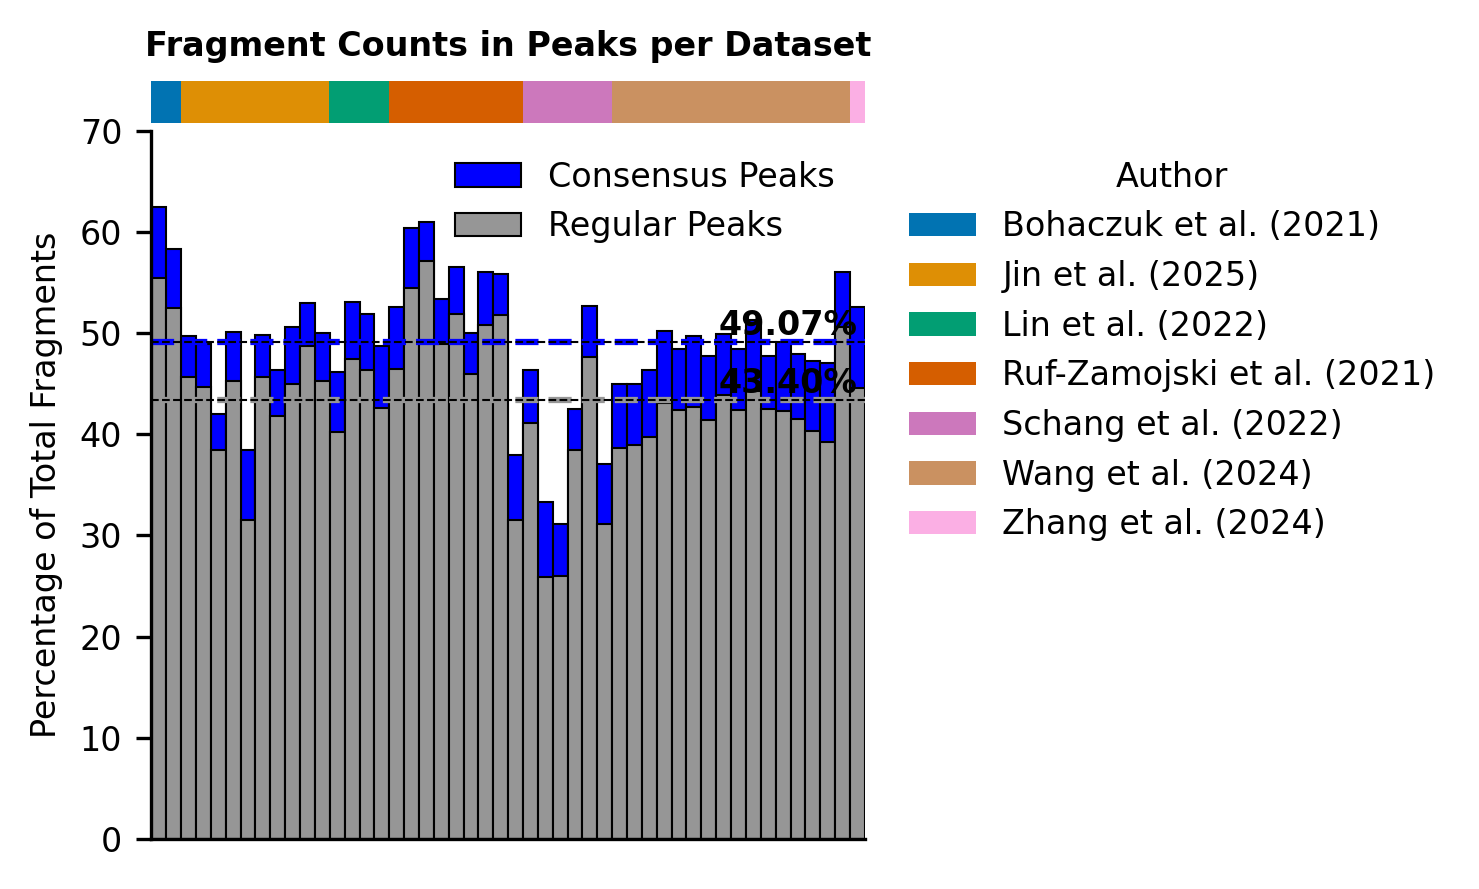

In [ ]:
# =========================
# Final plotting code
# =========================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# -------------------------------------------------
# Sort dataframe by Author
# -------------------------------------------------
df = df.sort_values('Author').reset_index(drop=True)

# -------------------------------------------------
# Extract data
# -------------------------------------------------
consensus_peaks = df['consensus_peaks'].values
regular_peaks   = df['orig_peaks'].values
total_fragments = df['n_all_frags'].values

# -------------------------------------------------
# Author → color (colorblind-safe)
# -------------------------------------------------
authors = df['Author'].unique()
palette = sns.color_palette("colorblind", len(authors))
author_color_map = dict(zip(authors, palette))

author_colors = np.stack(df['Author'].map(author_color_map).values)

# -------------------------------------------------
# Matplotlib style
# -------------------------------------------------
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'font.size': 8,
    'axes.labelsize': 8,
    'axes.titlesize': 8,
    'xtick.labelsize': 6,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'figure.titlesize': 8
})

# -------------------------------------------------
# Calculations
# -------------------------------------------------
consensus_percentages = (consensus_peaks / total_fragments) * 100
regular_percentages   = (regular_peaks   / total_fragments) * 100

avg_consensus = np.mean(consensus_percentages)
avg_regular   = np.mean(regular_percentages)

n_datasets = len(consensus_peaks)
indices = np.arange(n_datasets)

# -------------------------------------------------
# Figure
# -------------------------------------------------
fig, ax = plt.subplots(figsize=(5.0, 3), dpi=300)

dark_purple  = '#0000ff'
light_purple = '#969696'

ax.bar(indices, consensus_percentages, width=1,
       color=dark_purple, edgecolor='black', linewidth=0.5,
       label='Consensus Peaks')

ax.bar(indices, regular_percentages, width=1,
       color=light_purple, edgecolor='black', linewidth=0.5,
       label='Regular Peaks')

# Average lines
ax.axhline(avg_consensus, color=dark_purple, linestyle='--', linewidth=1.5)
ax.axhline(avg_regular,   color=light_purple, linestyle='--', linewidth=1.5)
ax.axhline(avg_consensus, color='black', linestyle='--', linewidth=0.5)
ax.axhline(avg_regular,   color='black', linestyle='--', linewidth=0.5)

# Labels
ax.text(n_datasets - 1, avg_consensus, f'{avg_consensus:.2f}%',
        ha='right', va='bottom', fontsize=8, fontweight='bold')
ax.text(n_datasets - 1, avg_regular, f'{avg_regular:.2f}%',
        ha='right', va='bottom', fontsize=8, fontweight='bold')

ax.set_ylabel('Percentage of Total Fragments')
ax.set_title('Fragment Counts in Peaks per Dataset', fontweight='bold')
ax.set_ylim(0, 70)
ax.set_xlim(-0.5, n_datasets - 0.5)
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# -------------------------------------------------
# TRUE column annotation strip (top)
# -------------------------------------------------
ax_annot = ax.inset_axes([0, 1.01, 1, 0.06])

ax_annot.imshow(author_colors[np.newaxis, :, :], aspect='auto')
ax_annot.set_xlim(-0.5, n_datasets - 0.5)
ax_annot.set_xticks([])
ax_annot.set_yticks([])
for spine in ax_annot.spines.values():
    spine.set_visible(False)

# -------------------------------------------------
# Legends
# -------------------------------------------------
peak_legend = ax.legend(frameon=False, loc='upper right')
ax.add_artist(peak_legend)

author_handles = [
    Patch(facecolor=author_color_map[a], edgecolor='none', label=a)
    for a in authors
]

ax.legend(handles=author_handles, title='Author',
          frameon=False, loc='upper left',
          bbox_to_anchor=(1.02, 1))

# -------------------------------------------------
# Save + show
# -------------------------------------------------
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/pituitary_atlas/Unstructured/peak_percentages_style.png', dpi=500, bbox_inches='tight')
plt.savefig('/content/drive/MyDrive/pituitary_atlas/Unstructured/peak_percentages_style.svg', dpi=500, bbox_inches='tight')
plt.show()



# Generate QC plots of how many samples remain after filtering

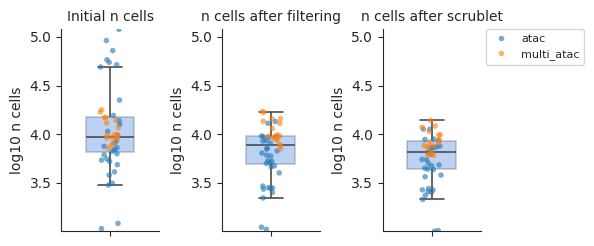

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


#log10 these
df["log10_init_n_cells"] = np.log10(df["init_n_cells"])
df["log10_cells_after_first_filter"] = np.log10(df["cells_after_first_filter"])
df["log10_cells_after_qc"] = np.log10(df["cells_after_qc"])
df["log10_cells_after_scrublet"] = np.log10(df["cells_after_scrublet"])

plot_vars = {
    "log10_init_n_cells": 'Initial n cells',
    "log10_cells_after_first_filter" : 'n cells after filtering',
    "log10_cells_after_scrublet" : 'n cells after scrublet'
             }

sns.set_style("ticks")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

fig, axes = plt.subplots(1, 3, figsize=(6, 2.5)) # Adjusted for a full page width
axes = axes.flatten() # Flatten to 1D array for easy iteration

min_across = df[list(plot_vars.keys())].min().min()
max_across = df[list(plot_vars.keys())].max().max()

qc_scores_df = df.copy()

#where Modality is multi_rna change to multi_atac
qc_scores_df["Modality"] = qc_scores_df["Modality"].replace("multi_rna", "multi_atac")

# Loop through the variables and axes
for i, (col, label) in enumerate(plot_vars.items()):
    ax = axes[i]

    # Boxplot
    sns.boxplot(data=qc_scores_df, y=col, ax=ax, showfliers=False,
                width=0.5, color="#0066ff", linewidth=1.2, boxprops=dict(alpha=0.3))

    # Stripplot
    sns.stripplot(data=qc_scores_df, y=col, ax=ax, alpha=0.6,
                   size=4,hue = "Modality")

    # Refine axes
    ax.set_ylabel("log10 n cells", fontsize=10)
    ax.set_xlabel("") # Remove x-axis label for single-group plots
    #title add label
    ax.set_title(label, fontsize=10)
    sns.despine(ax=ax) # Removes top and right spines

    # Optional: Tick label sizing
    ax.tick_params(axis='both', which='major', labelsize=10)


    if i == 2:
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    else:
        ax.get_legend().remove()

    #enforce y lims
    ax.set_ylim(min_across, max_across)


plt.tight_layout()
#save as png 500 dpi and svg
plt.savefig('/content/drive/MyDrive/pituitary_atlas/Unstructured/datasets_qc.png', dpi=500)
plt.savefig('/content/drive/MyDrive/pituitary_atlas/Unstructured/datasets_qc.svg')
plt.show()

In [ ]:
pip freeze

absl-py==1.4.0
accelerate==1.12.0
access==1.1.10.post3
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.3
aiosignal==1.4.0
aiosqlite==0.22.1
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.18.1
altair==5.5.0
anndata==0.12.9
annotated-doc==0.0.4
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.12.1
anywidget==0.9.21
apsw==3.51.2.0
apswutils==0.1.2
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array-api-compat==1.13.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.2.0
astropy-iers-data==0.2026.1.26.0.43.56
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.6
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.9
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.33.0
bigquery-magics==0.10.3
biopython==1.86
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==3.12.2
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.